<a href="https://colab.research.google.com/github/fnuArsh/PHYS-371/blob/main/orbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import numpy as np
import matplotlib.pyplot as plt



In [404]:
yr=365*24*3600
omega=(2*np.pi)/yr

In [458]:
G=6.6743e-11
mass_earth=5.9722e24
R=149517870700
mass_sun=1.988500e30
mu=mass_earth*mass_sun/(mass_sun+mass_earth)
inertia_earth=mass_earth*(R**2)

In [459]:
r = np.linspace(0, 1e12, 10000)
l=inertia_earth*omega
U_cent=(l**2)/(2*mu*(r**2))
U_eff=-(G*mass_earth*mass_sun/r)+U_cent
E=-G*mass_earth*mass_sun/(2*R)


<ipython-input-459-9cf80fdcde1c>:3: RuntimeWarning: divide by zero encountered in divide
  U_cent=(l**2)/(2*mu*(r**2))
<ipython-input-459-9cf80fdcde1c>:4: RuntimeWarning: divide by zero encountered in divide
  U_eff=-(G*mass_earth*mass_sun/r)+U_cent
<ipython-input-459-9cf80fdcde1c>:4: RuntimeWarning: invalid value encountered in add
  U_eff=-(G*mass_earth*mass_sun/r)+U_cent


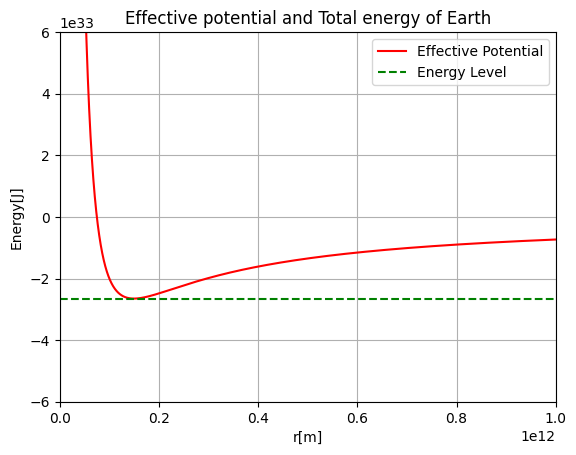

-2.650590047284228e+33


In [460]:
plt.plot(r, U_eff, label='Effective Potential', color='red')
plt.axhline(E, color='green', linestyle='--', label='Energy Level')
plt.xlabel('r[m]')
plt.ylabel('Energy[J]')
plt.xlim(0, 1e12)
plt.ylim(-6e33,6e33)

plt.legend()
plt.title('Effective potential and Total energy of Earth')
plt.grid()
plt.show()


print(E)



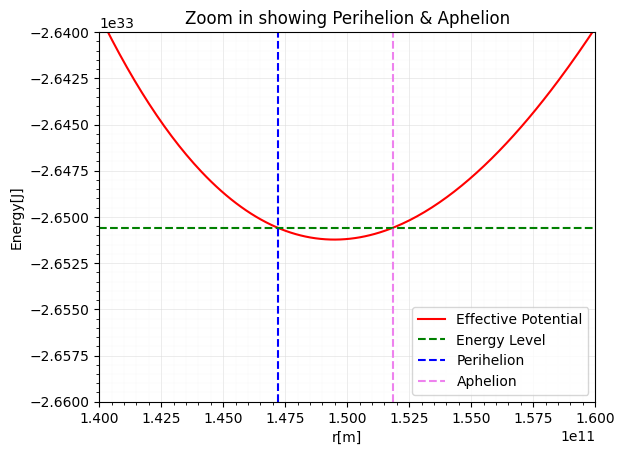

In [467]:
intersection_points = []

for i in range(1, len(r)):
    if (U_eff[i - 1] < E <= U_eff[i]) or (U_eff[i] < E <= U_eff[i - 1]):
        # Linear interpolation to find the approximate intersection point
        m = (U_eff[i] - U_eff[i - 1]) / (r[i] - r[i - 1])
        b = U_eff[i] - m * r[i]
        intersection_r = (E - b) / m
        intersection_points.append(intersection_r)
plt.plot(r, U_eff, label='Effective Potential', color='red')
plt.axhline(y=E, color='green', linestyle='--', label='Energy Level')
plt.axvline(x=intersection_points[0], color='blue', linestyle='--', label='Perihelion')
plt.axvline(x=intersection_points[1], color='violet', linestyle='--', label='Aphelion')
plt.xlabel('r[m]')
plt.ylabel('Energy[J]')
plt.xlim(1.400e11, 1.600e11)
plt.ylim(-2.6600e+33,-2.6400e+33)
plt.legend(loc='lower right')

plt.title('Zoom in showing Perihelion & Aphelion')
plt.grid(which='major', color='#DDDDDD', linewidth=0.4)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.3)
plt.minorticks_on()
plt.show()